# Matplotlib or Seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
total = data[["Make", "Price"]].groupby("Make").sum()
total

,Price
Make,
BMW,2501927.0
Honda,4107844.0
Nissan,2391288.0
Toyota,5563201.0


# Pie Chart

## Simple Pie Chart

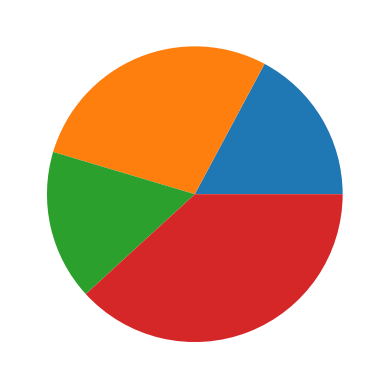

In [6]:
plt.pie(total.Price)
plt.show()

## Pie Chart with Label

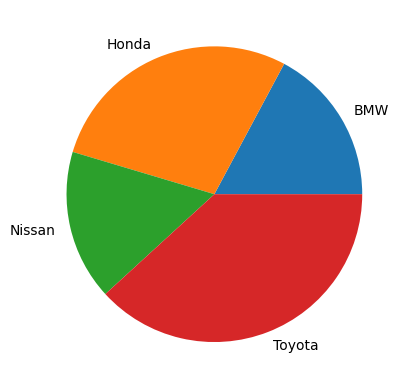

In [7]:
plt.pie(total.Price, labels = total.index)
plt.show()

## Hatch

(https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html)

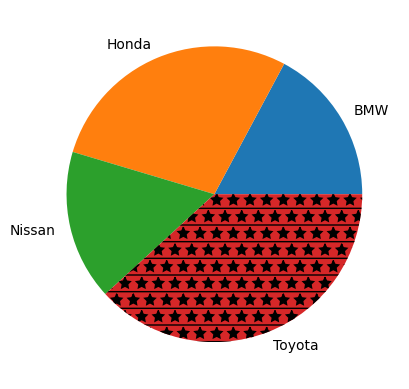

In [12]:
plt.pie(total.Price, labels = total.index, hatch=["","","","-*"])
plt.show()

## Percentage

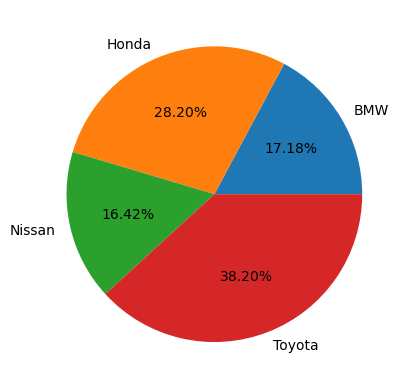

In [13]:
plt.pie(total.Price, labels = total.index, autopct="%.2f%%")
plt.show()

## Coloring

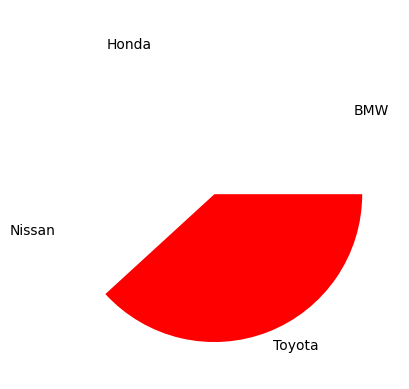

In [14]:
plt.pie(total.Price, labels = total.index, colors=["white", "white", "white","red"])
plt.show()

## Rotating

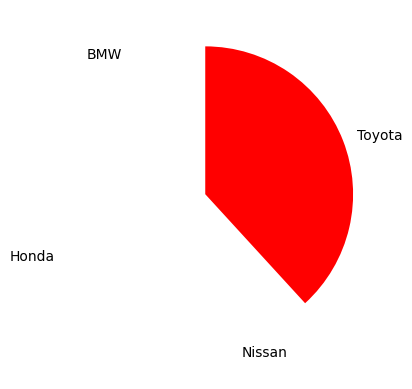

In [16]:
plt.pie(total.Price, labels = total.index, startangle=90, colors=["white", "white", "white","red"])
plt.show()